# Improve eddy tracking

The objective of this script is to improve the eddy tracking and remove all the bugs found in the first stage of development. 

In [1]:
# Importing all libraries except trackeddy.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
from trackeddy.trackeddy import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]
# Import velociry field
ncfileu=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output306/rregionsouthern_ocean_daily_u.nc')
ncfilev=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output306/rregionsouthern_ocean_daily_v.nc')
print ncfileu
lonu=ncfileu.variables['xu_ocean_sub01'][:]
latu=ncfileu.variables['yu_ocean_sub01'][:]
u=ncfileu.variables['u'][:,0,:,:]
v=ncfilev.variables['v'][:,0,:,:]

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    filename: rregionsouthern_ocean_daily_u.nc
    title: MOM5_CORE_NYF_50lvl_comparison_test
    grid_type: mosaic
    grid_tile: 1
    dimensions(sizes): xu_ocean_sub01(3600), yu_ocean_sub01(930), st_ocean(75), st_edges_ocean(76), time(90), nv(2)
    variables(dimensions): float64 xu_ocean_sub01(xu_ocean_sub01), float64 yu_ocean_sub01(yu_ocean_sub01), float64 st_ocean(st_ocean), float64 st_edges_ocean(st_edges_ocean), float64 time(time), float64 nv(nv), float32 u(time,st_ocean,yu_ocean_sub01,xu_ocean_sub01), float64 average_T1(time), float64 average_T2(time), float64 average_DT(time), float64 time_bounds(time,nv)
    groups: 



/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/numpy/ma/core.py:6457: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


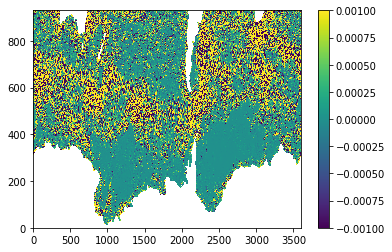

In [ ]:
okubo=okuboweissparm(u,v,0)
pcolormesh(okubo,vmin=-0.001,vmax=0.001)
colorbar()

0


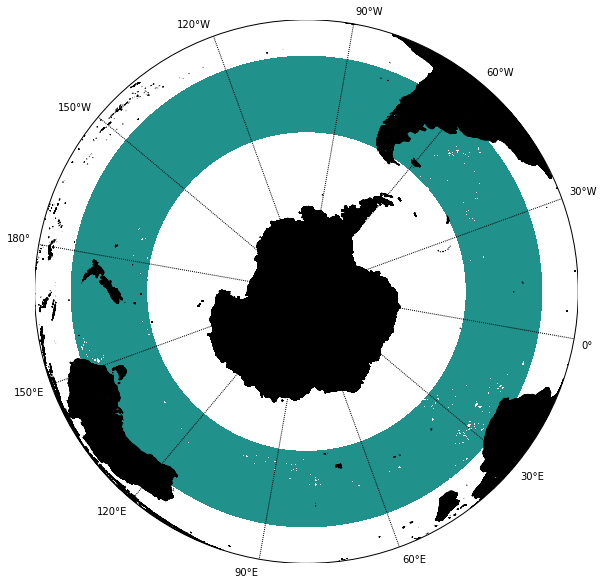

The total of contours was 51
('ts', 0)
1


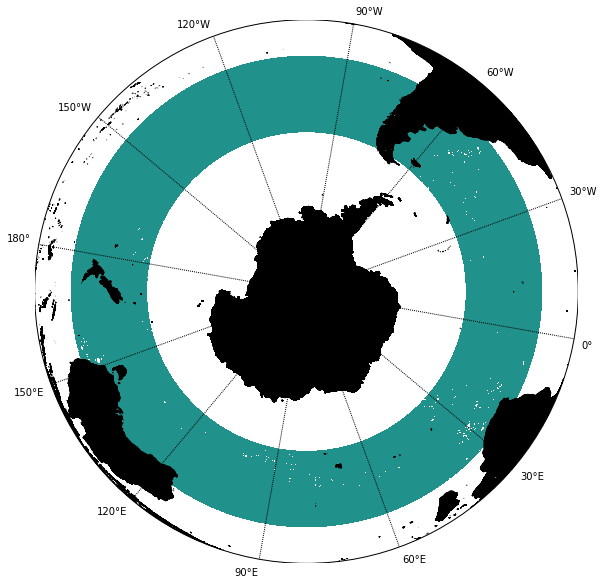

The total of contours was 54
('ts', 1)
eddyn_0
*****New Eddy*****
eddyn_1
number 2 max -206.750942102 t0 -207.040848533 t1 -207.035172139 min -207.3 area0 0.215280882054 area1 0.228522584512
2 -31.5313736906 -32.1019839432 -32.1244641556 -32.4737521431
****Tracking Eddy2****
2


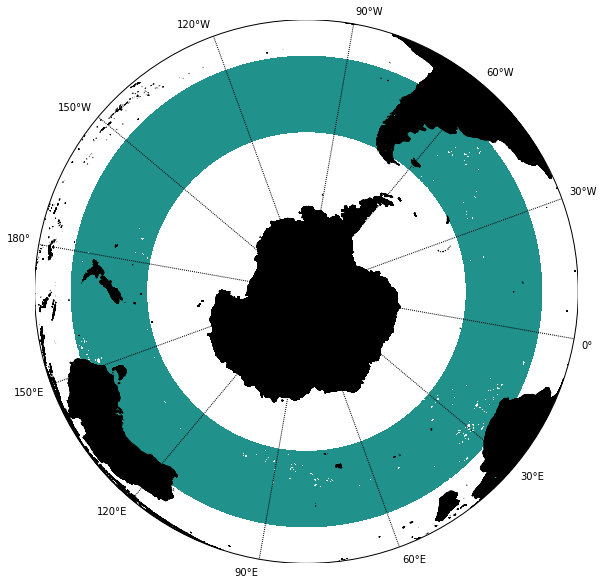

The total of contours was 61
('ts', 2)
eddyn_2
number 2 max -206.767166678 t0 -207.035172139 t1 -207.038292686 min -207.3 area0 0.228522584512 area1 0.20360983978
2 -31.566139092 -32.1244641556 -32.143300918 -32.4876511345
****Tracking Eddy2****
eddyn_0
*****New Eddy*****
eddyn_1
number 2 max -206.767166678 t0 -207.035172139 t1 -207.038292686 min -207.3 area0 [ 0.22852258] area1 0.20360983978
2 -31.566139092 -32.1244641556 -32.143300918 -32.4876511345
****Tracking Eddy2****
3


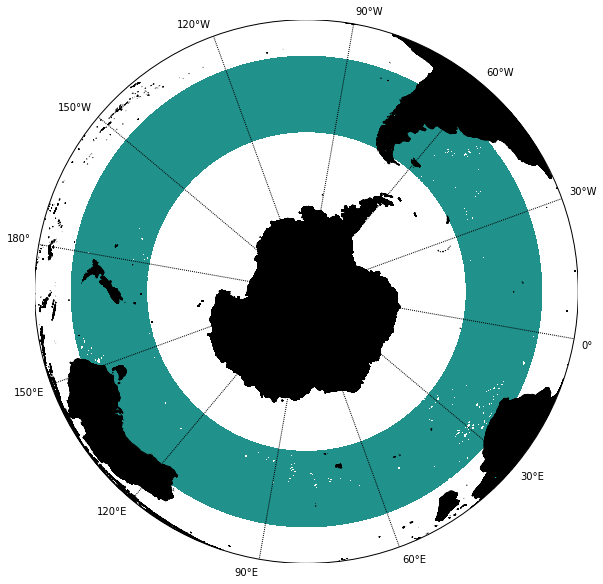

The total of contours was 49
('ts', 3)
eddyn_2
number 2 max -206.752276138 t0 -207.038292686 t1 -207.055068333 min -207.30828679 area0 0.20360983978 area1 0.207529905514
2 -31.6767213918 -32.143300918 -32.2173848054 -32.5250390971
****Tracking Eddy2****
eddyn_0
*****New Eddy*****
eddyn_1
number 2 max -206.752276138 t0 -207.038292686 t1 -207.055068333 min -207.30828679 area0 [ 0.20360984] area1 0.207529905514
2 -31.6767213918 -32.143300918 -32.2173848054 -32.5250390971
****Tracking Eddy2****
4


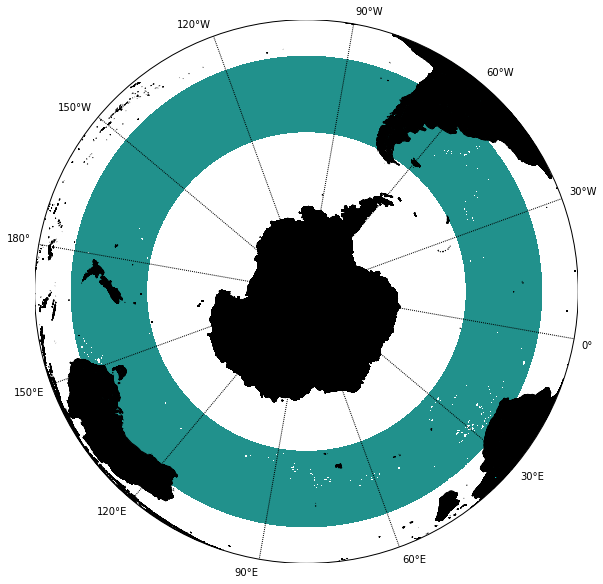

The total of contours was 59
('ts', 4)
eddyn_2
*****New Eddy*****
eddyn_0
*****New Eddy*****
eddyn_1
*****New Eddy*****
5


In [ ]:
areamap=array([[0,len(lon)],[600,len(lat)]])
levels=[-2*std(okubo),2*std(okubo)]
for ii in range(0,40):
    print ii
    ssha=okuboweissparm(u,v,ii)
    eddys=scan_eddym(ssha,lonu,latu,levels,ii,areamap,destdir='',okparm='',diagnostics=False)
    if ii==0:
        eddytd=dict_eddyt(ii,eddys)
    else:
        eddytd=dict_eddyt(ii,eddys,eddytd) 

In [ ]:
#4,2,3
eddy='eddyn_0'
print eddytd[eddy]['position']
for ii in range(0,len(eddytd[eddy]['time'])):
    rdd=eddytd[eddy]['time'][ii][0]
    print rdd
    dd="%03d" % ii
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(13, 6))
    ax1.pcolormesh(lon,lat,eta[rdd,:,:])
    ax1.plot(eddytd[eddy]['position'][ii,0],eddytd[eddy]['position'][ii,1],'*r')
    ax1.plot(eddytd[eddy]['contour'][ii,0],eddytd[eddy]['contour'][ii,1],'-m')
    c1,c2=find2d(lon,lat,eddytd[eddy]['contour'][ii,0].min(),eddytd[eddy]['contour'][ii,1].min())
    c3,c4=find2d(lon,lat,eddytd[eddy]['contour'][ii,0].max(),eddytd[eddy]['contour'][ii,1].max())
    ax2.contourf(lon[c1-4:c3+4],lat[c2-4:c4+4],eta[rdd,c2-4:c4+4,c1-4:c3+4])
    ax2.plot(eddytd[eddy]['position'][0:ii+1,0],eddytd[eddy]['position'][0:ii+1,1],'-r')
    ax2.plot(eddytd[eddy]['position'][0:ii+1,0],eddytd[eddy]['position'][0:ii+1,1],'*r')
    ax2.plot(eddytd[eddy]['contour'][ii,0],eddytd[eddy]['contour'][ii,1],'-m')
    #print eddytd['eddyn_14']['contour'][:,1]
    #print u[ii,c2:c4,c1:c3]
    #print lonu[c1],lonu[c3],latu[c2],latu[c4]
    #ax2.streamplot(lonu[c1:c3],latu[c2:c4],u[ii,c2:c4,c1:c3],v[rdd,c2:c4,c1:c3])
    #ax2.set_ylim([eddytd[eddy]['contour'][ii,1].min(),eddytd[eddy]['contour'][ii,1].max()])
    #ax2.set_xlim([eddytd[eddy]['contour'][ii,0].min(),eddytd[eddy]['contour'][ii,0].max()])
    ax2.set_title('Day '+str(rdd))
    #f.savefig('../output/'+eddy+str(dd)+'.png', bbox_inches='tight')
#eddytd['eddyn_14']
#figure()
#streamplot(lonu,latu,u[ii,:,:],v[ii,:,:], density=1)